# Linear Regression Assignment: Insurance Dataset

## Problem Statement
You have been provided with an **insurance dataset** that contains information about individuals, such as age, BMI, smoking status, and insurance charges. Your objective is to perform **Exploratory Data Analysis (EDA)** and build a **Linear Regression model** to predict the insurance charges based on the given features.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder


## Section 1: Data Inspection and Cleaning (10 Marks)
### Q1. Load the dataset and display the first five rows.
- Identify the columns present in the dataset.
- Check for missing values and data types.


In [2]:
#Load Data set
from google.colab import drive
drive.mount('/content/Drive')
df=pd.read_csv('/content/Drive/MyDrive/Insurance.csv')


Mounted at /content/Drive


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#Display top 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Q2. Handle missing values and duplicates if any.
- Remove or impute missing values appropriately.
- Drop duplicate records if found.

---

In [7]:
#Check for missing value
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
#Check for duplicated values
df.duplicated().sum()

np.int64(1)

In [9]:
#Remove Duplicates
df.drop_duplicates(inplace=True)
#check the shape after duplicate
df.shape

(1337, 7)

## Section 2: Exploratory Data Analysis (20 Marks)
### Q3. Perform Univariate Analysis on all numerical columns.
- Plot histograms and boxplots for each numerical column.
- Write your observations about the distribution of the data.


In [10]:
#Check the data types to perform EDA on each Individual Column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


<Axes: xlabel='age', ylabel='Count'>

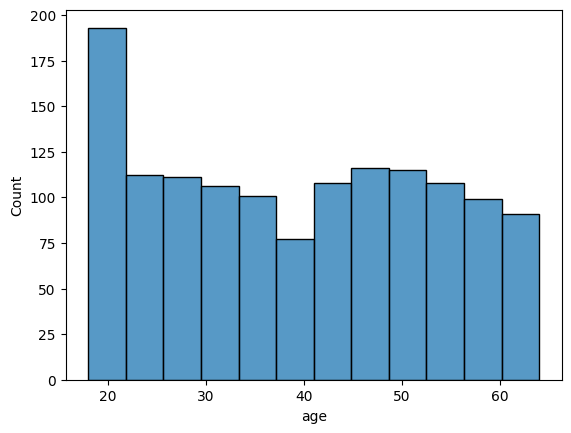

In [11]:
# 'age' Column
sns.histplot(data=df,x='age')

<Axes: xlabel='age'>

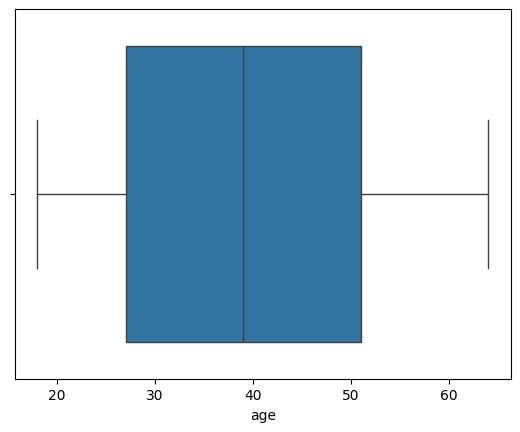

In [12]:
sns.boxplot(data=df,x='age')

Obervations:
1. The age distribution in this dataset is not uniform and
with a slight peak in the younger age groups and a gradual decline towards older ages.

<Axes: xlabel='children', ylabel='Count'>

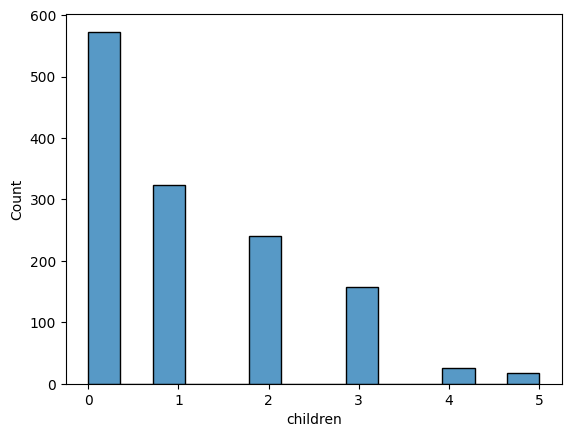

In [13]:
# 'children' Column
sns.histplot(data=df,x='children')

<Axes: xlabel='children'>

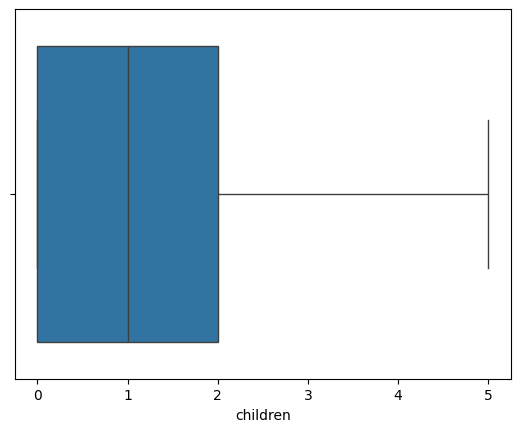

In [14]:
sns.boxplot(data=df,x='children')

Observations :
1. Children is clearly a discrete variable. The distribution shows that a significant portion of individuals have 0 children, followed by 1 or 2 children. The number of individuals with 3, 4, or 5 children is considerably lower.

<Axes: xlabel='bmi', ylabel='Count'>

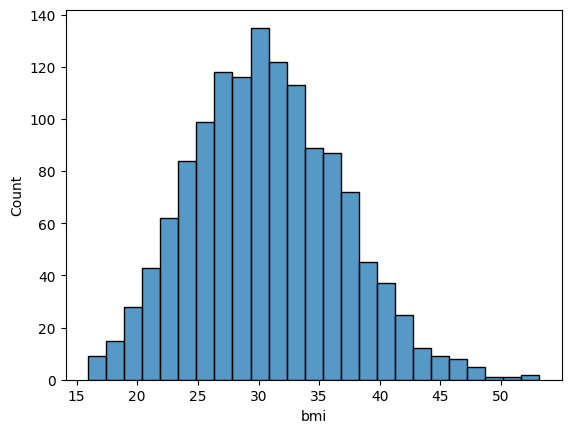

In [15]:
# 'bmi' column
sns.histplot(data=df,x='bmi')

<Axes: xlabel='bmi'>

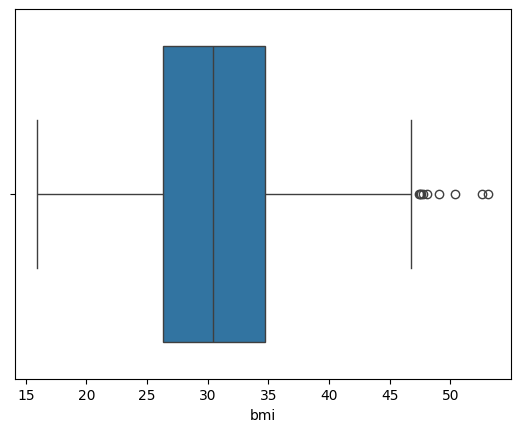

In [16]:
sns.boxplot(data=df,x='bmi')

Observations:
1. The BMI distribution looks roughly normal or slightly right-skewed, with a peak around the 30 mark. This indicates that most individuals in the dataset fall within a certain BMI range, with fewer individuals having very high BMIs.

<Axes: xlabel='charges', ylabel='Count'>

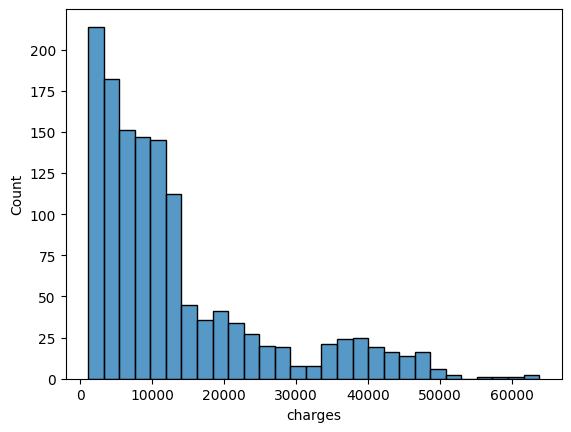

In [17]:
# 'charges' Column
sns.histplot(data=df,x='charges')

<Axes: xlabel='charges'>

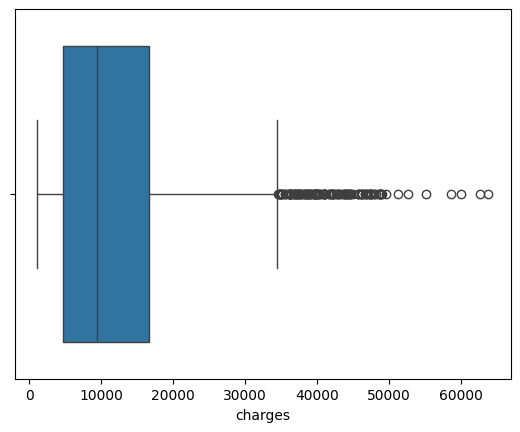

In [18]:
sns.boxplot(data=df,x='charges')

Observations:
1. The distribution of insurance charges is heavily right-skewed. This means that most individuals have relatively lower insurance charges around 10000, while a smaller number of individuals incur significantly higher charges


<Axes: xlabel='sex', ylabel='count'>

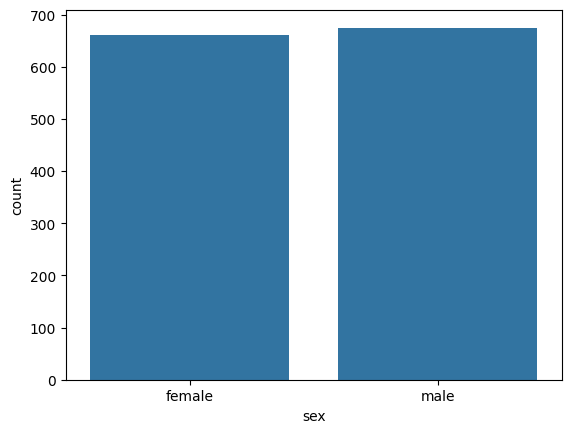

In [19]:
# 'sex' column
sns.countplot(data=df,x='sex')

In [20]:
df['sex'].value_counts(normalize=True)*100

,proportion
sex,
male,50.486163
female,49.513837


Observations :
1. The number of males and females in this dataset is very similar. There is a slightly higher count of males compared to females, but the difference is not substantial.

<Axes: xlabel='smoker', ylabel='count'>

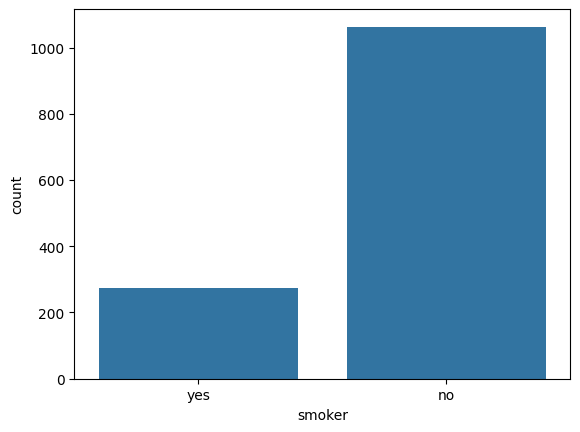

In [21]:
sns.countplot(data=df,x='smoker')

In [22]:
df['smoker'].value_counts(normalize=True)*100

,proportion
smoker,
no,79.506358
yes,20.493642


Observations:
1. the number of non-smokers is substantially higher than the number of smokers.Huge difference between Smokers and non Smokers

<Axes: xlabel='region', ylabel='count'>

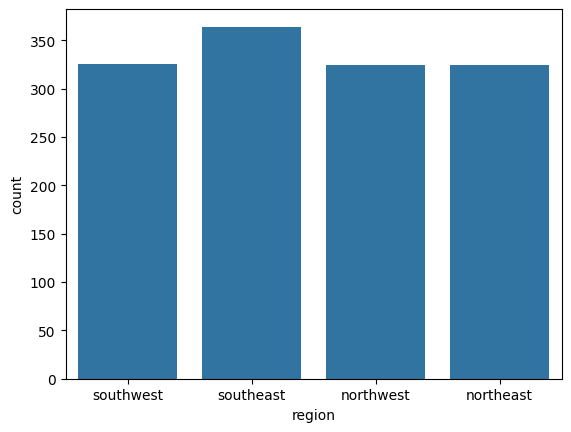

In [23]:
sns.countplot(data=df,x='region')

In [24]:
df['region'].value_counts(normalize=True)*100

,proportion
region,
southeast,27.225131
southwest,24.308153
northwest,24.233358
northeast,24.233358


Observations:
All regions have almost same number of records with South East region having more data compare to other regions


### Q4. Perform Bivariate Analysis.
- Use scatter plots to analyze relationships between independent variables and insurance charges.
- Provide insights based on your observations.

In [25]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


<Axes: xlabel='age', ylabel='charges'>

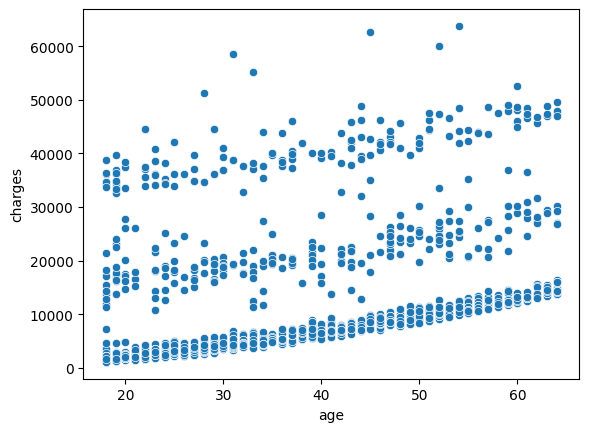

In [26]:
# Charges vs Age
sns.scatterplot(data=df,x='age',y='charges')

Observation:  
1. As age increases, the insurance charges tend to be higher
2. older individuals in this dataset generally have higher insurance costs.

<Axes: xlabel='bmi', ylabel='charges'>

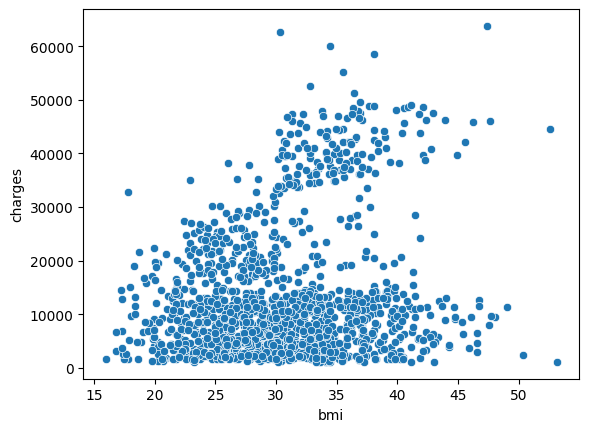

In [27]:
sns.scatterplot(data=df,x='bmi',y='charges')

Observations:
1. The highest insurance charges observed in this dataset generally correspond to individuals with BMIs above 30.
2. There are a few outliers with very high insurance charges, even for relatively moderate BMI values


<Axes: xlabel='children', ylabel='charges'>

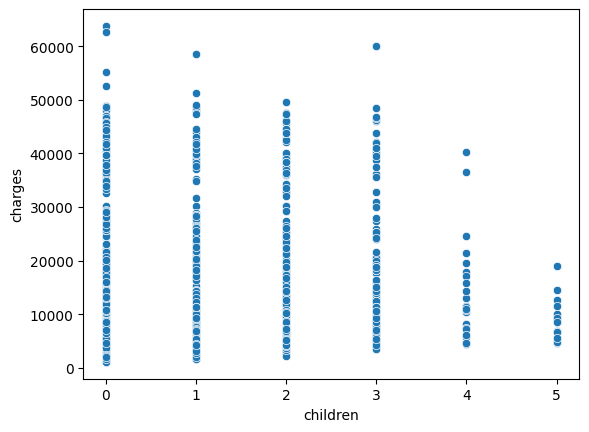

In [28]:
sns.scatterplot(data=df,x='children',y='charges')

Observations:
1. There isn't a strong linear relationship between the number of children and insurance charges. The average charge doesn't consistently increase or decrease as the number of children changes
2. We can see some outliers across all categories of the number of children

<Axes: xlabel='sex', ylabel='charges'>

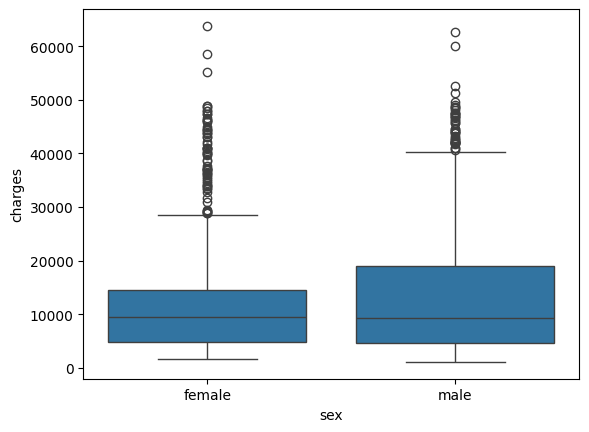

In [29]:
sns.boxplot(data=df,y='charges',x='sex')

Observations:
1.  Both males and females have high-value outliers in their insurance charges and Male category range greater than female category

<Axes: xlabel='smoker', ylabel='charges'>

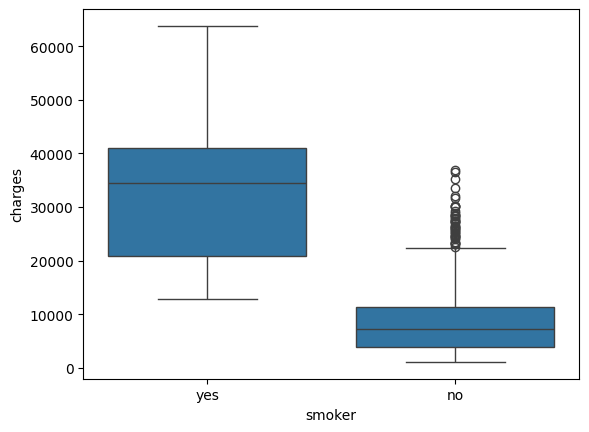

In [30]:
sns.boxplot(data=df,x='smoker',y='charges')

Observations :
1. Smoking status has a very strong positive correlation with insurance charges.
2.  Smokers pay considerably more for insurance than non-smokers



<Axes: xlabel='region', ylabel='charges'>

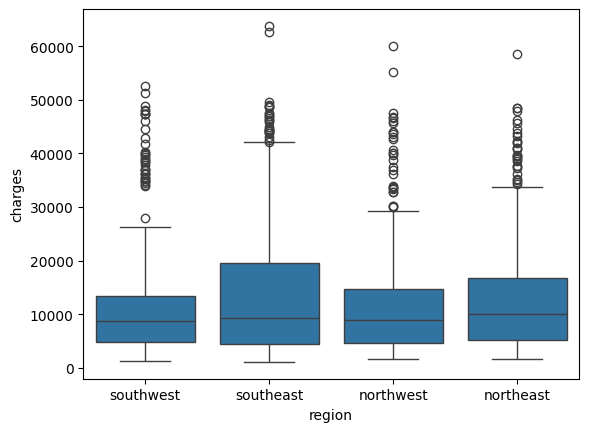

In [31]:
sns.boxplot(data=df,x='region',y='charges')

Observations:
1. The central tendency of charges is relatively consistent across the four regions.
2. There are outliers present in each region and individuals in each region pay more insurance charges at the higher trend.

### Q5. Perform Multivariate Analysis.
- Use pair plots to visualize relationships among all numerical variables.
- Write insights based on observed trends.

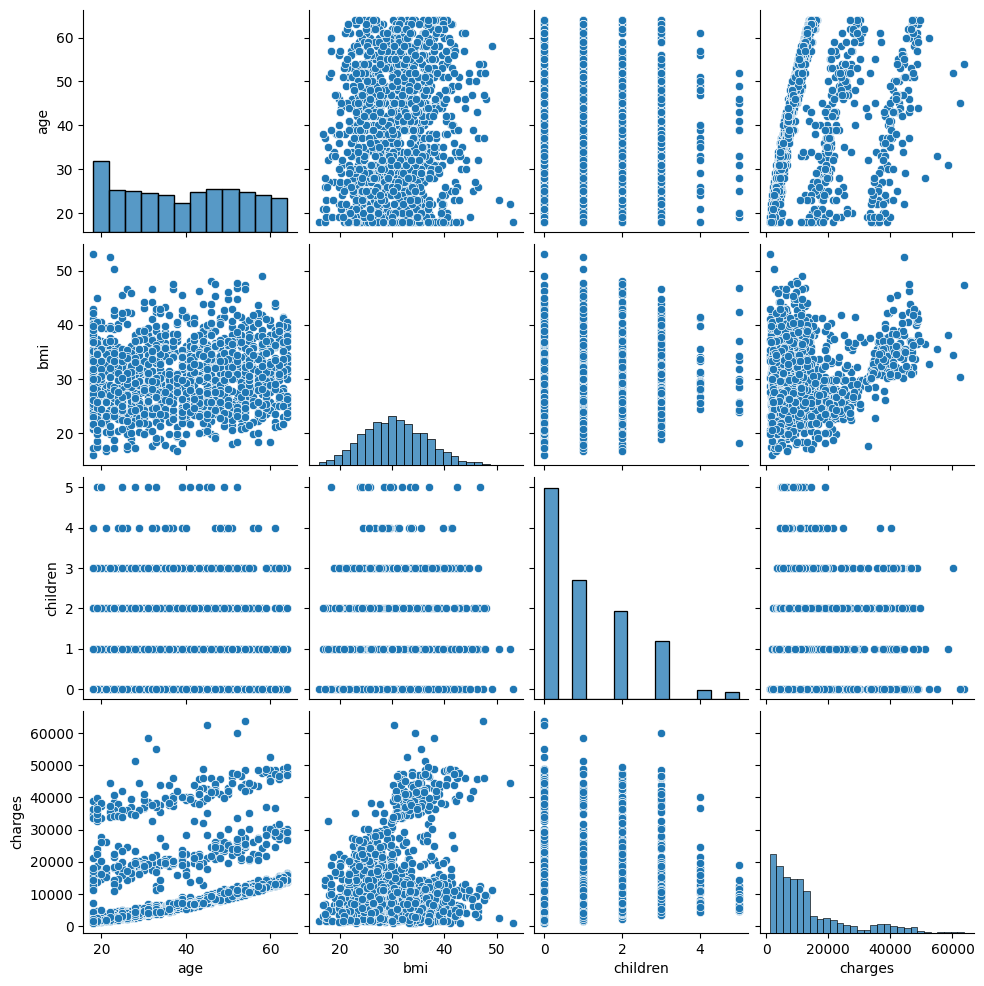

In [32]:
sns.pairplot(df)

Observations:
1. Age seems to be the most influential factor among these variables in predicting insurance charges, showing a positive trend.
2. BMI has a weaker positive association with charges.
3. The number of children doesn't appear to have a strong linear relationship with age, BMI, or insurance charges based on this visualization.
4. The right-skewed distribution of 'charges' suggests that a few individuals incur significantly higher costs

  



### Q6. Generate a Heatmap.
- Display the correlation matrix using a heatmap.
- Identify highly correlated features and provide interpretations.

---

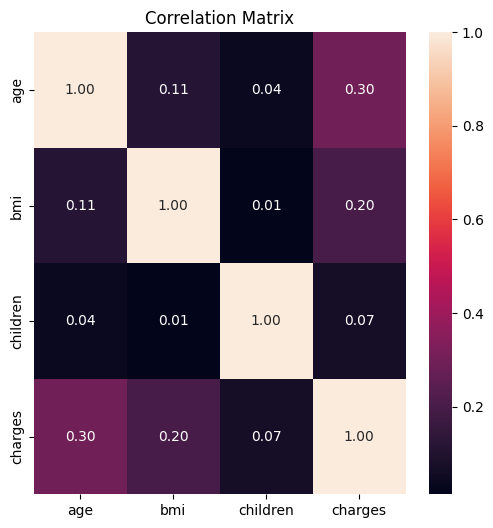

In [33]:
# sns.heatmap(df.corr(),annot=True)
df1=df.drop(columns=['smoker','sex','region'])
plt.figure(figsize=(6, 6))
sns.heatmap(df1.corr(), annot=True,  fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Oberservations:
#1 The strongest positive correlation observed is between 'age' and 'charges' (0.30)but the relationship isn't very strong.. This suggests that as age tends to increase, insurance charges also tend to increase.
#2 The correlation between the number of children and insurance charges is very weak and close to zero(0.07). This suggests that the number of children a person has has very little linear relationship with their insurance charges in this dataset.
#3 BMI shows a very weak positive association with charges.

## Section 3: Model Building and Evaluation (20 Marks)
### Q7. Split the dataset into training and testing sets.
- Use an **80-20** or **70-30** split.

In [35]:
#Transform Categorical data intp Numerical
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])

In [36]:
#Prepare the data by selecting releveant columns
X=df.drop(columns=['charges'])
y=df['charges']
#Split the data into Training and Testing
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

### Q8. Build a **Linear Regression Model**.
- Train the model using the training dataset.
- Display the model coefficients and intercept.

In [37]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
coeff = model.coef_
intercept=model.intercept_

In [39]:
print("\n Coefficinet Values : ",coeff)
print("\n intercept Vale :  ",intercept)


 Coefficinet Values :  [  252.03741011  -110.31315941   322.2408649    524.49382188
 22855.75293908  -270.84084621]

 intercept Vale :   -11502.550522993795


In [40]:
#Predict Training and Testing
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [41]:
#Score
model.score(X_train,y_train),model.score(X_test,y_test)

(0.736043270953723, 0.7724652729621758)

### Q9. Evaluate the model on the test dataset.
- Compute **R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)**.


In [42]:
def adjusted_r2(r2, n, k):
    """Calculate the adjusted R²."""
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

#Training Performance
mae_train=mean_absolute_error(y_train,y_train_pred)
mse_train=mean_squared_error(y_train,y_train_pred)
rmse_train=mse_train**0.5
r2_train=r2_score(y_train,y_train_pred)
adj_r2_train=adjusted_r2(r2_train,len(y_train),X_train.shape[1])

#Testing Performacne
mae_test=mean_absolute_error(y_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
rmse_test=mse_test**0.5
r2_test=r2_score(y_test,y_test_pred)
adj_r2_test=adjusted_r2(r2_test,len(y_test),X_test.shape[1])

### Q10. Interpret the Error Metrics.
- Explain the significance of each metric in evaluating model performance.
- What do these values indicate about the model's accuracy?

---

In [43]:
# Compare training and test performance
print("\nPerformance Comparison:")
print(f"Training vs Test MAE: ${mae_train:.2f} vs ${mae_test:.2f}")
print(f"Training vs Test MSE: ${mse_train:.2f} vs ${mse_test:.2f}")
print(f"Training vs Test RMSE: ${rmse_train:.2f} vs ${rmse_test:.2f}")
print(f"Training vs Test R²: {r2_train:.2f} vs {r2_test:.2f}")
print(f"Training vs Test Adj. R²: {adj_r2_train:.2f} vs {adj_r2_test:.2f}")


Performance Comparison:
Training vs Test MAE: $4168.50 vs $4182.80
Training vs Test MSE: $35842868.26 vs $38935221.01
Training vs Test RMSE: $5986.89 vs $6239.81
Training vs Test R²: 0.74 vs 0.77
Training vs Test Adj. R²: 0.73 vs 0.77


In [44]:
# Observations:
# The test MAE ($4182.80) is slightly higher than the training MAE ($4168.50).
# This indicates that the model's average prediction error is slightly worse on unseen data (the test set) compared to the data it was trained on.
# The R² values (around 0.74-0.77) indicate that your model explains a substantial portion (74% to 77%) of the variance in the insurance charges.
# This suggests a reasonably good fit to the data.


## Section 4: Model Interpretation and Conclusion (10 Marks)
### Q11. Explain the significance of each feature in predicting insurance charges.
- Which features are most impactful?
- How does smoking status affect the charges?

In [ ]:
#Smoking status huegly effects on Insurance charges
# There are (79.50 %) non smokers in the data set has less Insurance charges compared to smokers (20.49%)

### Q12. What are the limitations of your model?
- Discuss any assumptions of **Linear Regression** that might not hold in this dataset.
- Suggest improvements for better prediction accuracy.

---

In [ ]:
#we can do Feature Engineering to Transform existing lables and create new columns to improve accuracy.
# we can use Hyper Paramters for better model accuracy

## Submission Instructions
- Submit the **Jupyter Notebook (.ipynb)** with well-commented code and explanations.
- Provide visualizations and observations for each step.
- Ensure the notebook runs without errors before submission.

**Total Marks: 60**

---